In [71]:
# check if some features are more important than other features
import pandas as pd
import numpy as np

In [72]:
data_frame = pd.read_parquet('./dataset/relevance_challenge_valid.parquet')

In [73]:
data_frame.head(5)

,text,coordinates,label,raw_prediction,confidence,distance
246274,i'm at jalboot village in al ahmadi https://t....,"[47.78220261841334, 28.796369578665622]",1478,"[-0.16533367, 5.490072, -0.07687697, -0.028137...",0.097776,413.620188
19954,just posted a photo @ fringes https://t.co/ma1...,"[-114.60882437411358, 51.21439841204866]",469,"[-2.382054, -0.10486849, 0.36622486, -0.755341...",0.158510,7096.152333
4850,"ok, cleveland. here's the plan.\n\nwe need you...","[-75.0323028333211, 39.476737451506004]",385,"[-2.481499, -2.6620083, -0.20655325, -0.289278...",0.175566,607.165365
108015,@maisamo15677972 esgotada,"[-46.45847010250085, -5.46301167598722]",2323,"[3.0630562, -1.9455369, -1.4932183, -1.8799204...",0.015767,1200.366641
278357,@mzfrancesfx @moore10112 perfect date night!!,"[-91.9513874234886, 42.12479709049989]",682,"[-2.7112045, -2.0834854, 0.080568545, -0.49260...",0.010079,6900.667485


In [74]:
def softmax(x):
    # Compute the exponential values for each element in the input array
    exps = np.exp(x - np.max(x))

    # Compute the softmax values by dividing the exponential of each element by the sum of exponentials
    return exps / np.sum(exps)  

In [75]:
data_frame['probabilities'] = data_frame['raw_prediction'].apply(softmax)

In [76]:
data_frame['pred'] = data_frame['raw_prediction'].apply(lambda x: np.argmax(x))

In [77]:
data_frame = data_frame.sort_values('distance',ascending=False)

In [ ]:
import matplotlib.pyplot as plt

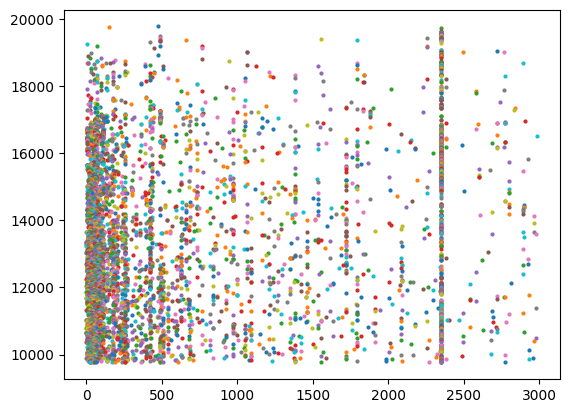

In [78]:

fig, ax = plt.subplots(sharex=True, sharey=True)
n_rows = int(len(data_frame)*0.1)

for j in range(n_rows):
    y_values = data_frame['distance'].iloc[j]
    x_values = data_frame['pred'].iloc[j]
    ax.scatter(x_values, y_values, s=4, alpha=1)

plt.show()

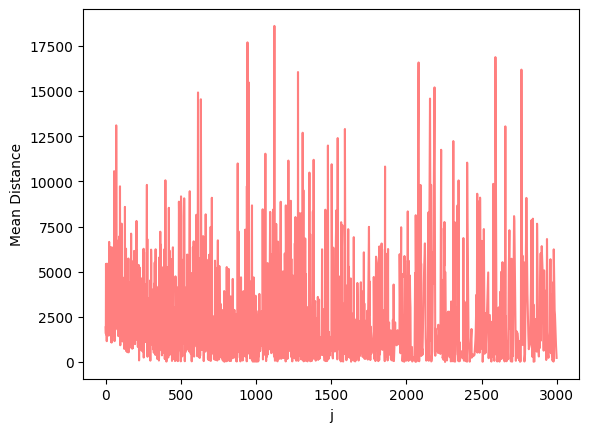

In [86]:
x_values = []
y_values = []
counts = []
for j in range(3000):
    filtered_data = data_frame[data_frame['pred'] == j]
    if not filtered_data.empty:
        x_values.append(j)
        y_values.append(filtered_data['distance'].mean())
        counts.append(len(filtered_data['distance']))

plt.plot(x_values, y_values,alpha=0.5,c='red')
plt.xlabel('j')
plt.ylabel('Mean Distance')
plt.show()


In [87]:
mean_distance_pred = pd.DataFrame([x for x in zip(x_values,y_values,counts)])

In [88]:
mean_distance_pred.rename(columns={0: 'feature'}, inplace=True)
mean_distance_pred.rename(columns={1:'mean_distance'},inplace=True)
mean_distance_pred.rename(columns={2:'counts'},inplace=True)

In [89]:
mean_distance_pred.head(3)

,feature,mean_distance,counts
0,0,1922.248722,718
1,1,1569.556990,280
2,2,5433.019070,493


In [90]:
mean_distance_pred = mean_distance_pred.sort_values('mean_distance')
# mean_distance_pred = mean_distance_pred[mean_distance_pred['counts'] < 10]
mean_distance_pred.describe()

,feature,mean_distance,counts
count,1589.000000,1589.000000,1589.000000
mean,1206.519824,2470.849024,34.833228
std,839.310286,2640.603113,99.905953
min,0.000000,2.501483,1.000000
25%,471.000000,588.941785,2.000000
50%,1078.000000,1632.661244,7.000000
75%,1859.000000,3433.895302,24.000000
max,2999.000000,18607.526381,1388.000000


In [96]:
# hence we can observe that classes that are more rarely occurring have a greater error
mean_distance_pred_t = mean_distance_pred[mean_distance_pred['counts'] >= len(data_frame)/3000]
mean_distance_pred_t.describe()

,feature,mean_distance,counts
count,474.000000,474.000000,474.000000
mean,713.810127,2690.077094,104.388186
std,719.948355,1975.228217,162.948808
min,0.000000,105.763881,19.000000
25%,151.750000,1200.374581,30.000000
50%,459.500000,2152.990940,51.000000
75%,1049.250000,3780.147702,107.500000
max,2976.000000,13101.444380,1388.000000


In [97]:
valid_pred = mean_distance_pred['feature'].to_list()

In [100]:
data_frame_t = data_frame[data_frame['pred'].isin(valid_pred)]

In [102]:
data_frame_t.describe()

,label,confidence,distance,pred
count,55350.000000,55350.000000,55350.000000,55350.000000
mean,1242.981174,0.087257,3260.978350,534.615375
std,878.870178,0.161525,4202.391081,705.178024
min,1.000000,0.001973,0.751505,0.000000
25%,427.000000,0.012323,378.965748,51.000000
50%,1127.000000,0.027760,1254.280157,197.000000
75%,2002.000000,0.073279,4598.103009,731.000000
max,2999.000000,0.989569,19791.642460,2999.000000
